# Central limit theorem exploration

My browser does not seem to support Russian fonts in python so I will be writing in English

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Let's look at Gamma distribution
### https://en.wikipedia.org/wiki/Gamma_distribution

In [2]:
from scipy.stats import gamma
a = 1.99

# calculate mean and variance
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
print 'mean=',mean,'var=',var

mean= 1.99 var= 1.99


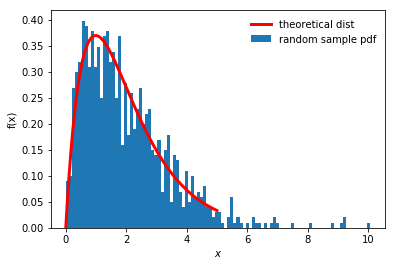

In [3]:
rv = gamma(a)
# theoretical pdf
x = np.linspace(0.,5., 1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, 'r-',lw=3, label='theoretical dist')

# random pdf
sample = rv.rvs(1000)
plt.hist(sample, bins=100,normed=True,label='random sample pdf')
plt.ylabel('f(x)')
plt.xlabel('$x$')
plt.legend(loc='best', frameon=False)
plt.show()

### Define function for calculation and plotting of a mean distribution histogram as a function of number of samples n randomly selected from the initial Gamma distribution.
### Mean value \bar x_n is calculated for each set of randomly selected n samples. Then the process is repeated 1000 times to generate a distribution.


In [4]:

def plotHist(n,mean,var):
    ave = []
    for i in range(0, 1000): 
        tt=gamma.rvs(a, size=n)
        ave.append(np.mean(tt))
    plt.hist(ave,bins=30,normed=True, label='Histogram')
    plt.ylabel(r'$F(\bar x_n)$')
    plt.xlabel(r'$\bar x_n$')

    # variance of the mean distribution is reduced by ~1/n
    # standard deviation goes down as 1/(n**0.5)
    norm_rv = sts.norm(mean, np.sqrt(var/n))
    x = np.linspace(0.,5.,1000)
    sample_norm = norm_rv.pdf(x)
    plt.step(x,sample_norm,'r-',lw=3, label='Normal Dist')
    plt.legend(loc='best', frameon=False)
    plt.title('n=%s'%(n))
    print 'n=',n, 'mean=',mean,'sigma=',(var/n)**0.5

n= 5 mean= 1.99 sigma= 0.630872411824


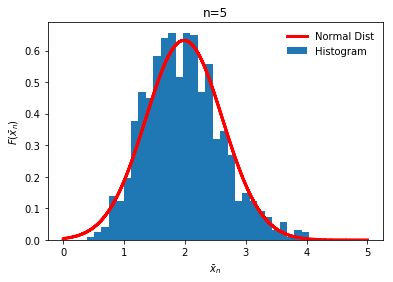

In [5]:
# For n=5
plotHist(5,mean,var)

n= 15 mean= 1.99 sigma= 0.364234356791


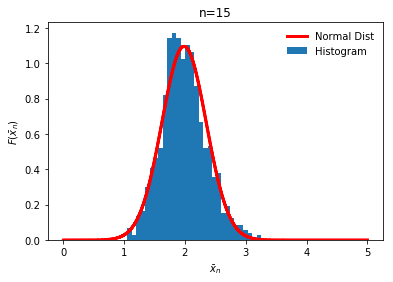

In [6]:
# For n=15
plotHist(15,mean,var)

n= 50 mean= 1.99 sigma= 0.199499373433


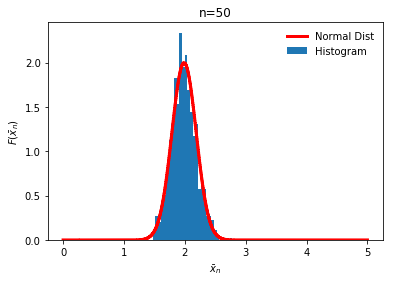

In [7]:
# For n=50
plotHist(50,mean,var)

## One can observe that the distribution of the mean values \bar x_n is well approximated by the normal distribution. As the number of random samples n is increasing, the distribution of the means is getting tighter with standard deviation following ~1/sqrt(n) dependence. This is exactly what predicted by the Central Limit Theorem

n= 5 mean= 1.99 sigma= 0.630872411824
n= 15 mean= 1.99 sigma= 0.364234356791
n= 50 mean= 1.99 sigma= 0.199499373433


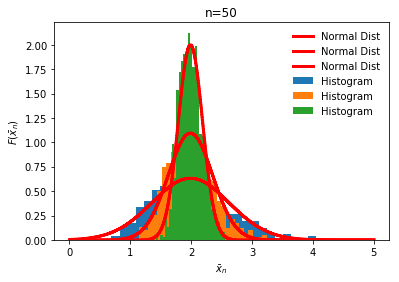

In [8]:
plotHist(5,mean,var)
plotHist(15,mean,var)
plotHist(50,mean,var)